In [1]:
## Get dependencies ##

import numpy as np
import string
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from UnFaIRv2_0 import *
import scipy as sp
import pickle
import time

In [20]:
# An example model run with pulse emissions, N gas cycle parameter sets

emissions = return_empty_emissions(1800,2500,np.arange(4))

emissions.loc[1801,(slice(None),'CO2')] = [2,4,8,16]
emissions.loc[1801,(slice(None),'CH4')] = [2,4,8,16]
emissions.loc[1801,(slice(None),'N2O')] = [2,4,8,16]

gas_params = default_gas_forcing_params()

thermal_params = default_thermal_params()

gas_uncert = default_gas_forcing_param_uncertainty()

gas_param_set = [gas_params['default']]

N = 500

for i in np.arange(N):

    gas_param_set += [gas_params['default'] * np.random.normal(np.ones(gas_params.shape),gas_uncert)]
        
gas_param_set = pd.concat(gas_param_set, keys = [x + 'gas' for x in [str(i) for i in np.arange(N)]],axis=1)

start_time = time.time()
model_run = run_UnFaIR(emissions,gas_parameters=gas_param_set)
print(time.time()-start_time)

#emissions
#model_run = run_UnFaIR(emissions)

Integrating 4 scenarios, 500 gas cycle parameter sets, 1 thermal response parameter sets, over ['CO2', 'CH4', 'N2O'], between 1800 and 2500...
6.85411262512207


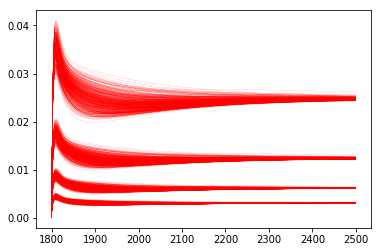

In [21]:
model_run['T'].plot(legend=None,color='r',linewidth=0.1)